In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "vlim"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  
%run -i /home/cz136/project/sa/lib/src/corr_func.py  

In [4]:
# z_diff=float(z_diff)

In [5]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [6]:
if vol!="uber":
    members=shapes

In [7]:
if quantile!="":
    i=int(quantile)

In [8]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [9]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [10]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [11]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [12]:
NBINS=10

In [13]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [14]:
len(shapes)

10084

In [15]:
len(members)

10084

In [16]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [17]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

24it [00:00, 234.70it/s]

46it [00:00, 229.65it/s]

61it [00:00, 195.66it/s]

76it [00:00, 178.39it/s]

98it [00:00, 188.62it/s]

120it [00:00, 196.20it/s]

142it [00:00, 201.73it/s]

165it [00:00, 208.87it/s]

188it [00:00, 214.22it/s]

211it [00:01, 217.75it/s]

234it [00:01, 220.99it/s]

257it [00:01, 216.41it/s]

279it [00:01, 207.16it/s]

302it [00:01, 211.41it/s]

328it [00:01, 221.66it/s]

353it [00:01, 228.39it/s]

379it [00:01, 234.89it/s]

404it [00:01, 238.33it/s]

429it [00:01, 241.28it/s]

454it [00:02, 243.15it/s]

479it [00:02, 245.02it/s]

505it [00:02, 246.81it/s]

530it [00:02, 232.67it/s]

554it [00:02, 231.30it/s]

578it [00:02, 230.68it/s]

602it [00:02, 230.10it/s]

626it [00:02, 229.12it/s]

645it [00:02, 223.25it/s]


0it [00:00, ?it/s]

24it [00:00, 236.78it/s]

Number of empty sat catalogs is 0


48it [00:00, 236.34it/s]

72it [00:00, 235.04it/s]

96it [00:00, 233.76it/s]

119it [00:00, 232.56it/s]

143it [00:00, 232.93it/s]

167it [00:00, 233.66it/s]

190it [00:00, 232.07it/s]

212it [00:00, 227.82it/s]

236it [00:01, 230.38it/s]

260it [00:01, 232.91it/s]

284it [00:01, 234.84it/s]

308it [00:01, 234.93it/s]

332it [00:01, 235.80it/s]

356it [00:01, 234.70it/s]

380it [00:01, 235.24it/s]

404it [00:01, 235.25it/s]

428it [00:01, 236.18it/s]

452it [00:01, 237.08it/s]

476it [00:02, 237.80it/s]

500it [00:02, 238.33it/s]

524it [00:02, 238.00it/s]

548it [00:02, 237.55it/s]

572it [00:02, 236.32it/s]

596it [00:02, 236.51it/s]

620it [00:02, 229.48it/s]

643it [00:02, 228.94it/s]

645it [00:02, 233.67it/s]

Number of empty sat catalogs is 0


In [18]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [19]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/corr_func.py:131: RuntimeWarning: invalid value encountered in true_divide
  return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)
/home/cz136/project/sa/lib/src/corr_func.py:147: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
/home/cz136/project/sa/lib/src/corr_func.py:155: RuntimeWarning: overflow encountered in square
  jk_var=(1-1/N)*np.sum(jk_xi_array-mean,axis=0)**2


In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

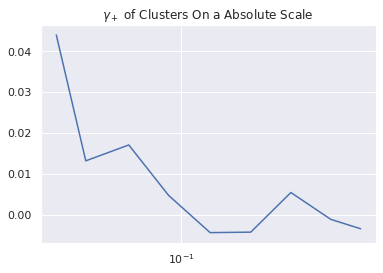

Aggregated xi:
[  0.      -1.5415  -2.8043  -6.7218  -3.0341   5.177    7.3385 -11.9592
   2.7996   2.4817]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -131.3321  -726.2354 -1146.426  -1578.4762 -2289.9842
 -2529.2776 -2270.3058 -1328.8979  -151.5681]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   35.  213.  394.  645. 1166. 1696. 2215. 2366.  709.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.044  -0.0132 -0.0171 -0.0047  0.0044  0.0043 -0.0054  0.0012
  0.0035]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7523 -3.4096 -2.9097 -2.4472 -1.964  -1.4913 -1.025  -0.5617
 -0.2138]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

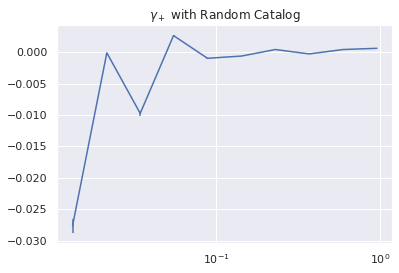

[-0.0277 -0.0001 -0.0097  0.0026 -0.001  -0.0006  0.0004 -0.0003  0.0004
  0.0006]
[ 1.0889e-03  3.9534e-06  3.8372e-04 -1.0405e-04  3.8333e-05  2.4147e-05
 -1.6655e-05  1.0962e-05 -1.6673e-05 -2.4312e-05]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

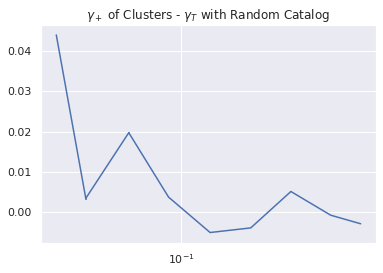

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

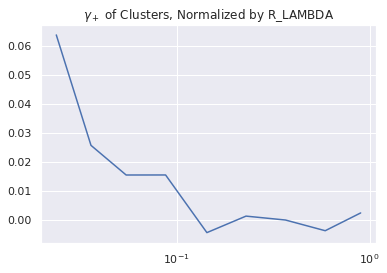

Aggregated xi:
[ 0.     -0.1911 -3.3317 -4.2065 -7.9878  3.9217 -1.7758  0.2264  9.1769
 -4.0962]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.       -11.2191  -432.346   -793.3995 -1261.5601 -1711.4622
 -2118.0377 -2034.0452 -1283.1728  -189.2566]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.    3.  130.  273.  518.  881. 1435. 2025. 2418. 1756.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0637 -0.0256 -0.0154 -0.0154  0.0045 -0.0012  0.0001  0.0038
 -0.0023]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7397 -3.3257 -2.9062 -2.4354 -1.9426 -1.476  -1.0045 -0.5307
 -0.1078]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)